Files already downloaded and verified
Files already downloaded and verified


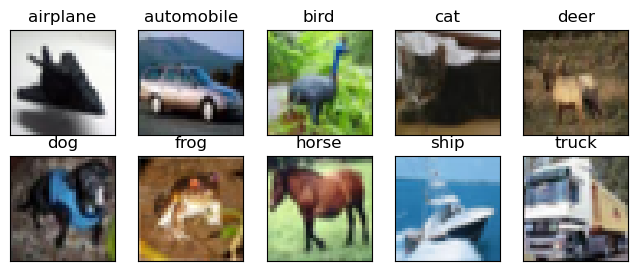

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [44]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)


from torchvision import datasets

# Daten runterladen: Trainings- und Validierungsdaten
cifar10 = datasets.CIFAR10('data', train=True, download=True)
cifar10_val = datasets.CIFAR10('data', train=False, download=True)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10

# für jede Klasse ein subplot
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i) # einzelnes Bild pro Klasse raussuchen und auf Klassennamen prüfen
    plt.imshow(img)
plt.show()


from torchvision import transforms
cifar10 = datasets.CIFAR10('data', train=True, download=False,
                          transform=transforms.ToTensor())

img, _ = cifar10[99]

imgs = torch.stack([img for img, _ in cifar10], dim=3)

imgs.view(3, -1).mean(dim=1)
imgs.view(3, -1).std(dim=1)
# Normalisierungsfunktion mit Werte der Standardab. und Mttelwertberechnung
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

In [45]:
# für Trainingsdatensatz
cifar10 = datasets.CIFAR10('data', train=True, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

In [46]:
# für Validierungsdatensatz
cifar10_val = datasets.CIFAR10('data', train=False, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))
# Alle Flugzeug- und Vögelbilder raussuchen
label_map = {0: 0, 2: 1}
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [47]:
# NLL Funktion
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100
# deutlich schneller weil weniger Bilder
loss_NLL = np.zeros(n_epochs)
for epoch in range(n_epochs):
    
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
    loss_NLL[epoch-1] = loss.detach().numpy()
    

Epoch: 0, Loss: 0.552094
Epoch: 1, Loss: 0.484176
Epoch: 2, Loss: 0.557825
Epoch: 3, Loss: 0.554888
Epoch: 4, Loss: 0.570663
Epoch: 5, Loss: 0.350973
Epoch: 6, Loss: 0.591266
Epoch: 7, Loss: 0.548075
Epoch: 8, Loss: 0.190939
Epoch: 9, Loss: 0.437478
Epoch: 10, Loss: 0.350288
Epoch: 11, Loss: 0.243390
Epoch: 12, Loss: 0.190494
Epoch: 13, Loss: 0.358921
Epoch: 14, Loss: 0.516138
Epoch: 15, Loss: 0.274657
Epoch: 16, Loss: 0.386394
Epoch: 17, Loss: 0.116322
Epoch: 18, Loss: 0.338291
Epoch: 19, Loss: 0.239839
Epoch: 20, Loss: 0.518006
Epoch: 21, Loss: 0.167759
Epoch: 22, Loss: 0.298613
Epoch: 23, Loss: 0.279513
Epoch: 24, Loss: 0.182074
Epoch: 25, Loss: 0.294607
Epoch: 26, Loss: 0.412752
Epoch: 27, Loss: 0.219163
Epoch: 28, Loss: 0.151529
Epoch: 29, Loss: 0.112381
Epoch: 30, Loss: 0.297842
Epoch: 31, Loss: 0.374713
Epoch: 32, Loss: 0.309709
Epoch: 33, Loss: 0.250677
Epoch: 34, Loss: 0.306587
Epoch: 35, Loss: 0.145437
Epoch: 36, Loss: 0.209056
Epoch: 37, Loss: 0.257786
Epoch: 38, Loss: 0.323

In [48]:
# MSE Loss Funktion
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 1),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.MSELoss()

n_epochs = 100
# deutlich schneller weil weniger Bilder
loss_MSE = np.zeros(n_epochs)
for epoch in range(n_epochs):
    
    for imgs, labels in train_loader:
        labels = labels.float()
        outputs = model(imgs.view(imgs.shape[0], -1))
        #outputs.requires_grad = True
        loss2 = loss_fn(outputs,labels.view(-1, 1))
        
        optimizer.zero_grad()
        #loss = loss.float()
        loss2.backward()
        
        optimizer.step()
        
    
    print("Epoch: %d, Loss: %f" % (epoch, float(loss2)))
    loss_MSE[epoch-1] =  loss2.detach().numpy()
   

Epoch: 0, Loss: 0.375000
Epoch: 1, Loss: 0.375000
Epoch: 2, Loss: 0.750000
Epoch: 3, Loss: 0.562500
Epoch: 4, Loss: 0.625000
Epoch: 5, Loss: 0.312500
Epoch: 6, Loss: 0.625000
Epoch: 7, Loss: 0.500000
Epoch: 8, Loss: 0.437500
Epoch: 9, Loss: 0.562500
Epoch: 10, Loss: 0.375000
Epoch: 11, Loss: 0.687500
Epoch: 12, Loss: 0.500000
Epoch: 13, Loss: 0.437500
Epoch: 14, Loss: 0.687500
Epoch: 15, Loss: 0.625000
Epoch: 16, Loss: 0.687500
Epoch: 17, Loss: 0.687500
Epoch: 18, Loss: 0.437500
Epoch: 19, Loss: 0.625000
Epoch: 20, Loss: 0.750000
Epoch: 21, Loss: 0.500000
Epoch: 22, Loss: 0.500000
Epoch: 23, Loss: 0.562500
Epoch: 24, Loss: 0.562500
Epoch: 25, Loss: 0.687500
Epoch: 26, Loss: 0.500000
Epoch: 27, Loss: 0.500000
Epoch: 28, Loss: 0.687500
Epoch: 29, Loss: 0.500000
Epoch: 30, Loss: 0.500000
Epoch: 31, Loss: 0.562500
Epoch: 32, Loss: 0.687500
Epoch: 33, Loss: 0.750000
Epoch: 34, Loss: 0.562500
Epoch: 35, Loss: 0.312500
Epoch: 36, Loss: 0.375000
Epoch: 37, Loss: 0.687500
Epoch: 38, Loss: 0.687

<function matplotlib.pyplot.show(close=None, block=None)>

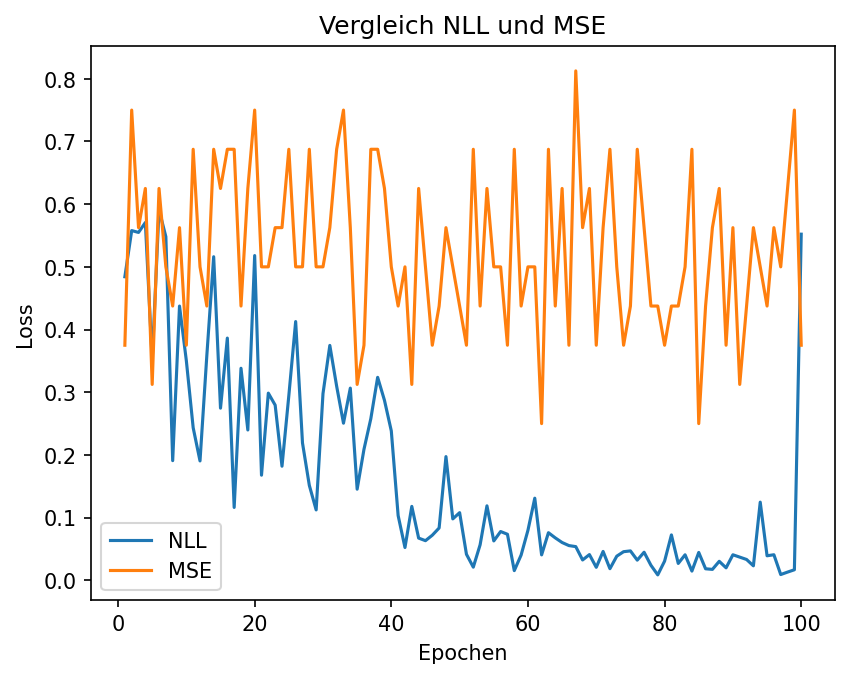

In [49]:
epochs = np.arange(1, 101, 1)
fig = plt.figure(dpi=150)
plt.plot(epochs, loss_NLL)
plt.plot(epochs, loss_MSE)
plt.xlabel("Epochen")
plt.ylabel("Loss")
plt.legend(['NLL' ,'MSE'])
plt.title("Vergleich NLL und MSE")
plt.show

In [50]:
# NLL Funktion kleineres Netz
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 64),
            nn.Tanh(),
            nn.Linear(64, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100
# deutlich schneller weil weniger Bilder
loss_NLL = np.zeros(n_epochs)
for epoch in range(n_epochs):
    
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
    loss_NLL[epoch-1] = loss.detach().numpy()
    

Epoch: 0, Loss: 0.428097
Epoch: 1, Loss: 0.383749
Epoch: 2, Loss: 0.474139
Epoch: 3, Loss: 0.603846
Epoch: 4, Loss: 0.397909
Epoch: 5, Loss: 0.363166
Epoch: 6, Loss: 0.371298
Epoch: 7, Loss: 0.302655
Epoch: 8, Loss: 0.244207
Epoch: 9, Loss: 0.406151
Epoch: 10, Loss: 0.470077
Epoch: 11, Loss: 0.554943
Epoch: 12, Loss: 0.498083
Epoch: 13, Loss: 0.179052
Epoch: 14, Loss: 0.490139
Epoch: 15, Loss: 0.342143
Epoch: 16, Loss: 0.316933
Epoch: 17, Loss: 0.350807
Epoch: 18, Loss: 0.331044
Epoch: 19, Loss: 0.406965
Epoch: 20, Loss: 0.405725
Epoch: 21, Loss: 0.520840
Epoch: 22, Loss: 0.200216
Epoch: 23, Loss: 0.445749
Epoch: 24, Loss: 0.135444
Epoch: 25, Loss: 0.308728
Epoch: 26, Loss: 0.319461
Epoch: 27, Loss: 0.151975
Epoch: 28, Loss: 0.182402
Epoch: 29, Loss: 0.212073
Epoch: 30, Loss: 0.173703
Epoch: 31, Loss: 0.540927
Epoch: 32, Loss: 0.136506
Epoch: 33, Loss: 0.200872
Epoch: 34, Loss: 0.186440
Epoch: 35, Loss: 0.379993
Epoch: 36, Loss: 0.219967
Epoch: 37, Loss: 0.206656
Epoch: 38, Loss: 0.287

In [51]:
# MSE Loss Funktion mit kleinerem Netz
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 64),
            nn.Tanh(),
            nn.Linear(64, 1),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.MSELoss()

n_epochs = 100
# deutlich schneller weil weniger Bilder
loss_MSE = np.zeros(n_epochs)
for epoch in range(n_epochs):
    
    for imgs, labels in train_loader:
        labels = labels.float()
        outputs = model(imgs.view(imgs.shape[0], -1))
        #outputs.requires_grad = True
        loss2 = loss_fn(outputs,labels.view(-1, 1))
        
        optimizer.zero_grad()
        #loss = loss.float()
        loss2.backward()
        
        optimizer.step()
        
    
    print("Epoch: %d, Loss: %f" % (epoch, float(loss2)))
    loss_MSE[epoch-1] =  loss2.detach().numpy()
   

Epoch: 0, Loss: 0.187500
Epoch: 1, Loss: 0.375000
Epoch: 2, Loss: 0.687500
Epoch: 3, Loss: 0.375000
Epoch: 4, Loss: 0.500000
Epoch: 5, Loss: 0.562500
Epoch: 6, Loss: 0.437500
Epoch: 7, Loss: 0.250000
Epoch: 8, Loss: 0.687500
Epoch: 9, Loss: 0.562500
Epoch: 10, Loss: 0.750000
Epoch: 11, Loss: 0.437500
Epoch: 12, Loss: 0.625000
Epoch: 13, Loss: 0.562500
Epoch: 14, Loss: 0.250000
Epoch: 15, Loss: 0.500000
Epoch: 16, Loss: 0.562500
Epoch: 17, Loss: 0.750000
Epoch: 18, Loss: 0.625000
Epoch: 19, Loss: 0.187500
Epoch: 20, Loss: 0.500000
Epoch: 21, Loss: 0.437500
Epoch: 22, Loss: 0.500000
Epoch: 23, Loss: 0.562500
Epoch: 24, Loss: 0.437500
Epoch: 25, Loss: 0.562500
Epoch: 26, Loss: 0.437500
Epoch: 27, Loss: 0.250000
Epoch: 28, Loss: 0.625000
Epoch: 29, Loss: 0.437500
Epoch: 30, Loss: 0.500000
Epoch: 31, Loss: 0.250000
Epoch: 32, Loss: 0.375000
Epoch: 33, Loss: 0.500000
Epoch: 34, Loss: 0.500000
Epoch: 35, Loss: 0.500000
Epoch: 36, Loss: 0.437500
Epoch: 37, Loss: 0.312500
Epoch: 38, Loss: 0.375

<function matplotlib.pyplot.show(close=None, block=None)>

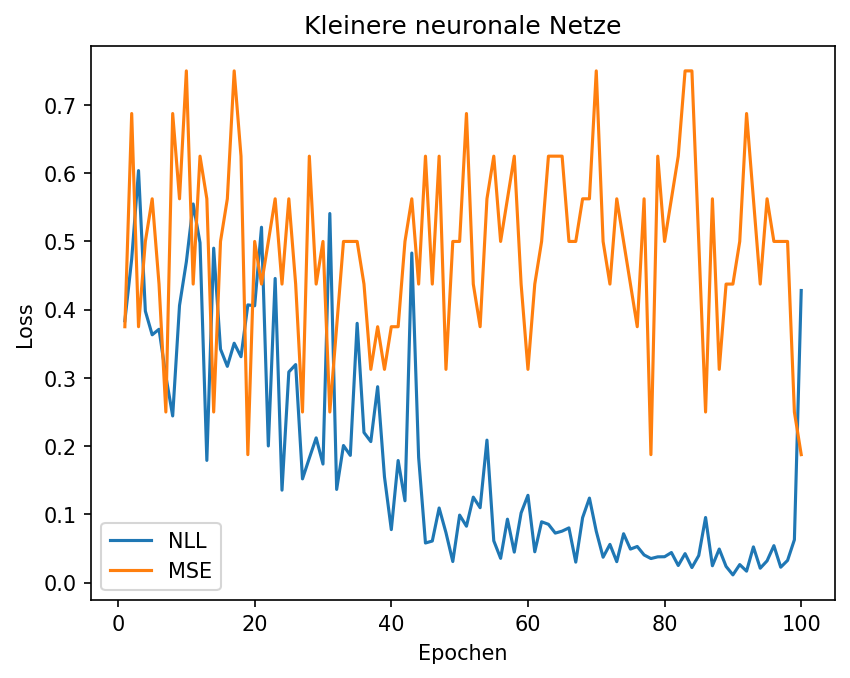

In [52]:
epochs = np.arange(1, 101, 1)
fig = plt.figure(dpi=150)
plt.plot(epochs, loss_NLL)
plt.plot(epochs, loss_MSE)
plt.xlabel("Epochen")
plt.ylabel("Loss")
plt.legend(['NLL' ,'MSE'])
plt.title("Kleinere neuronale Netze")
plt.show